In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
stocks = pd.read_csv('stock_prices.csv')
stocks

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,74.059998,75.150002,73.797501,75.087502,73.785904,135480400
1,2020-01-03,74.287498,75.144997,74.125000,74.357498,73.068573,146322800
2,2020-01-06,73.447502,74.989998,73.187500,74.949997,73.650787,118387200
3,2020-01-07,74.959999,75.224998,74.370003,74.597504,73.304413,108872000
4,2020-01-08,74.290001,76.110001,74.290001,75.797501,74.483597,132079200
...,...,...,...,...,...,...,...
248,2020-12-24,131.320007,133.460007,131.100006,131.970001,130.802322,54930100
249,2020-12-28,133.990005,137.339996,133.509995,136.690002,135.480591,124486200
250,2020-12-29,138.050003,138.789993,134.339996,134.869995,133.676682,121047300
251,2020-12-30,135.580002,135.990005,133.399994,133.720001,132.536850,96452100


In [3]:
hi = stocks.High
lo = stocks.Low
mp = (hi + lo) / 2
mp_list = mp.to_list()
# print(mp_list)

HighestHigh = []
LowestLow = []
for i in range(8, 253):
    HighestHigh.append(max(mp_list[i:i - 8:-1]))
    LowestLow.append(min(mp_list[i:i - 8:-1]))

First = (2/3)*((mp_list[8] - LowestLow[0])/(HighestHigh[0] - LowestLow[0])-0.5)
Val = [First]
for j in range(1, 245):
    vtemp = (2/3)*((mp_list[8+j] - LowestLow[j])/(HighestHigh[j] - LowestLow[j])-0.5)
    Val.append(vtemp+(2/3)*Val[-1])
Val_series = pd.Series(Val)
stocks['Val']=Val_series
# print(Val)

fisher_one = (1/2)*math.log((1+Val[0])/(1-Val[0]))
fisher = [fisher_one]
for k in range(1, 245):
    ftemp = (1/2)*np.log((1+Val[k])/(1-Val[k]))
    fisher.append(ftemp+(1/2)*fisher[-1])
Fisher_series = pd.Series(fisher)
stocks['Fisher']=Fisher_series
    
stocks
# print(fisher)

,Date,Open,High,Low,Close,Adj Close,Volume,Val,Fisher
0,2020-01-02,74.059998,75.150002,73.797501,75.087502,73.785904,135480400,0.333333,0.346574
1,2020-01-03,74.287498,75.144997,74.125000,74.357498,73.068573,146322800,0.471119,0.684794
2,2020-01-06,73.447502,74.989998,73.187500,74.949997,73.650787,118387200,0.605958,1.044907
3,2020-01-07,74.959999,75.224998,74.370003,74.597504,73.304413,108872000,0.737306,1.467003
4,2020-01-08,74.290001,76.110001,74.290001,75.797501,74.483597,132079200,0.824870,1.905370
...,...,...,...,...,...,...,...,...,...
248,2020-12-24,131.320007,133.460007,131.100006,131.970001,130.802322,54930100,NaN,NaN
249,2020-12-28,133.990005,137.339996,133.509995,136.690002,135.480591,124486200,NaN,NaN
250,2020-12-29,138.050003,138.789993,134.339996,134.869995,133.676682,121047300,NaN,NaN
251,2020-12-30,135.580002,135.990005,133.399994,133.720001,132.536850,96452100,NaN,NaN


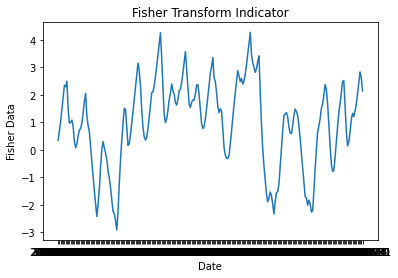

In [4]:
plt.plot(stocks.Date[8:], fisher)
plt.xlabel('Date')
plt.ylabel('Fisher Data')
plt.title('Fisher Transform Indicator')
plt.savefig('Fisher Transform Indicator')
plt.show()